#Mushroom data classification

Menggunakan algoritma Naive Bayes dan KNN

Step
1. Analisa Data
2. Data Preprocessing
3. Classification

#Analisa Data

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('mushrooms.csv')


#CEK APAKAH ADA VALUE YANG NULL
df.isnull().values.any()

False

In [29]:
def report(y_test,y_pred):
    total = len(y_pred)

    tp=len([i for i in range(0,total) if y_test[i]==1 and y_pred[i]==1])
    tn=len([i for i in range(0,total) if y_test[i]==0 and y_pred[i]==0])
    fp=len([i for i in range(0,total) if y_test[i]==1 and y_pred[i]==0])
    fn=len([i for i in range(0,total) if y_test[i]==0 and y_pred[i]==1])
    confusion_matrix=np.array([[tp,fp],[fn,tn]])
    akurasi=(tp+tn)/total
    presisi=tp/(tp+fp)
    recall=tp/(tp+fn)
    fmeasure=(2*recall*presisi)/(recall+presisi)
    print("Confussion Matrix:")
    print(confusion_matrix)
    print("Akurasi: ", akurasi)
    print("Precision: ",presisi)
    print("Recall: ", recall )
    print("F-Measure: ", fmeasure)

In [2]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Hapus kolom veil-type karena semua data bernilai sama

In [4]:
"""
Hapus kolom veil type karena nilai sama
dan tidak berpengaruh terhadap model
"""

df = df.drop(["veil-type"], axis = 1)

X = df.iloc[:,1:22]
Y = df['class']

Periksa dependent kolom (class) apakah seimbang atau tidak, apabila tidak seimbang dataset tidak representatif

<function matplotlib.pyplot.show(*args, **kw)>

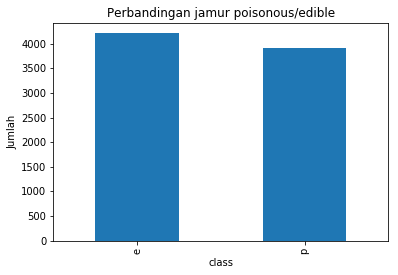

In [6]:
import matplotlib.pyplot as plt

plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Jumlah")
plt.xlabel("class")
plt.title('Perbandingan jamur poisonous/edible')
plt.show

Data cukup seimbang maka kita dapat melakukan klasifikasi

#Data Preprocessing
Semua kolom dicoba untuk metode ini (All in)

1. tiap kolom yang memiliki lebih dari 2 class akan dibuat dummy kolom

In [7]:
X_dum = pd.DataFrame()
"Buat dummy variabel tiap class tiap kolom, cap-shape,cap-surface,cap-color"

for col in X.iloc[:,:3].columns:
    dum = pd.get_dummies(X[col])
    for dcol in dum.columns:
        name = col +"_"+ dcol
        X_dum[name] = dum[dcol]
        
"odor, gill-attachment, gill-spacing"
for col in X.iloc[:,4:7].columns:
    dum = pd.get_dummies(X[col])
    for dcol in dum.columns:
        name = col +"_"+ dcol
        X_dum[name] = dum[dcol]
        
"gill-color"
dum = pd.get_dummies(X['gill-color'])
for dcol in dum.columns:
    name = "gill-color_"+ dcol
    X_dum[name] = dum[dcol]
    
"sisanya yg memiliki >2 class"
for col in X.iloc[:,10:].columns:
    dum = pd.get_dummies(X[col])
    for dcol in dum.columns:
        name = col +"_"+ dcol
        X_dum[name] = dum[dcol]
        
"bruises"
X_dum['bruises'] = np.where(X['bruises']=='t', 1, 0)

"gill-size"
X_dum['gill-size'] = np.where(X['gill-size']=='b', 1, 0)

"stalk-shape"
X_dum['stalk-shape'] = np.where(X['stalk-shape']=='e', 1, 0)

"ganti value y jika edible 1, poison 0"
Y = np.where(Y=='e', 1,0)


In [12]:
#kolom setelah ditambah dummy
print(X_dum.columns)

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w', 'bruises', 'gill-size', 'stalk-shape'],
      dtype='object', length=113)


2.Pisahkan data training dan testing 70:30

In [8]:
index_train = round(0.7*len(X))
X_train = X_dum.iloc[:index_train,:]
X_test = X_dum.iloc[index_train:,:]
Y_train = Y[:index_train]
Y_test = Y[index_train:]

#Classification


##Naive Bayes
menggunakan algoritma naive bayes mendapatkan tiap kolom probabilitas untuk class edible dan poison

P(X|e) = ?
P(X|p) = ?

![NaiveBayes](https://cdn-images-1.medium.com/max/800/1*iuLad-Li3t-QjPy-lao94Q.png)

In [9]:
import NBClassification as NB
nb = NB.NBClassification(X_train, Y_train, X_test, Y_test)
res2 = nb.predict()

C:\Users\MAMEN\NO1\NBClassification.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.train['class'] = self.Y_train
C:\Users\MAMEN\NO1\NBClassification.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test['class'] = self.Y_test


##Hasil

Kita lihat confussion matrix dan akurasi

In [30]:
report(res2['actual'],res2['predicted'])

Confussion Matrix:
[[ 185  424]
 [   0 1828]]
Akurasi:  0.826015592942142
Precision:  0.30377668308702793
Recall:  1.0
F-Measure:  0.46599496221662473


Akurasi untuk naive bayes adalah 82% memprediksi tepat sesuai data testing, tetapi model tidak presisi menebak jamur yang bisa dimakan, maka model ini kurang baik.

##K-Nearest Neighbour

Algoritma dengan mengecek k - data terdekat untuk mendapatkan class.

Menggunakan k=7

In [13]:
import KNNClassification as KNN
knn = KNN.KNNClassification(7, X_train, Y_train, X_test, Y_test)
res = knn.predict()

C:\Users\MAMEN\NO1\KNNClassification.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.X_train['class'] = self.Y_train


##Hasil

In [24]:
report(res['actual'],res['predicted'])

Confussion Matrix:
[[ 592    0]
 [  17 1828]]
Akurasi:  0.9930242100943784
Precision:  1.0
Recall:  0.9720853858784894
F-Measure:  0.9858451290591174


Akurasi model hampir 100%, dan model presisi menebak jamur yang bisa dimakan 100%, model ini baik. namun kelemahan K-NN adalah lama saat memprediksi (lazy learner).